In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
import tensorflow.compat.v1 as tf
import pandas as pd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from IPython.display import clear_output
from time import sleep
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Enhance IT/Week_5/churn.csv')

In [ ]:
data.head(5)

,Unnamed: 0,index,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('index', axis = 1)
data = data.drop('RowNumber', axis = 1)
data = data.drop('CustomerId', axis = 1)
data = data.drop('Surname', axis = 1)

## Exploratory Analysis & Data Prep.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data.groupby('Gender').Exited.mean()

Gender
Female    0.250715
Male      0.164559
Name: Exited, dtype: float64

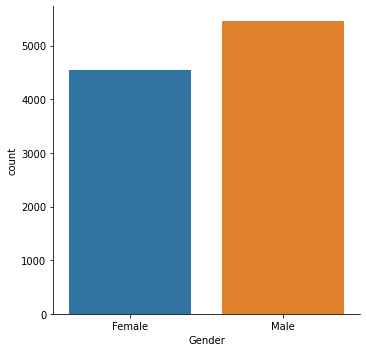

In [ ]:
sns.catplot(x= 'Gender', kind = 'count', data = data)

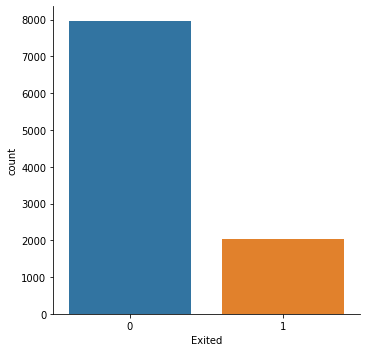

In [ ]:
sns.catplot(x= 'Exited', kind = 'count', data = data)

In [ ]:
data.groupby('Exited').count()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,7963,7963,7963,7963,7963,7963,7963,7963,7963,7963
1,2037,2037,2037,2037,2037,2037,2037,2037,2037,2037


In [ ]:
geo_dummies = pd.get_dummies(data.Geography, prefix = 'Country')
gender_dummies = pd.get_dummies(data.Gender, prefix = 'Gender')
creditCard_dummies = pd.get_dummies(data.HasCrCard, prefix = 'CreditCrd')
activity_dummies = pd.get_dummies(data.IsActiveMember, prefix = 'Active')
#Exited_dummies = pd.get_dummies(data.Exited, prefix = 'Churned')

In [ ]:
data = pd.concat([data, geo_dummies, gender_dummies,creditCard_dummies, activity_dummies], axis=1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,CreditCrd_0,CreditCrd_1,Active_0,Active_1
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [ ]:
data = data.drop('Geography', axis = 1)
data = data.drop('Gender', axis = 1)
data = data.drop('HasCrCard', axis = 1)
data = data.drop('IsActiveMember', axis = 1)
#data = data.drop('Exited', axis = 1)

In [ ]:
data.head(3)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,CreditCrd_0,CreditCrd_1,Active_0,Active_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0


In [ ]:
data.shape

(10000, 16)

## Normalizing Some Variables

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
data['normCredScore'] = StandardScaler().fit_transform(data['CreditScore'].values.reshape(-1, 1))
data = data.drop(['CreditScore'], axis=1)
data.head()

,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,CreditCrd_0,CreditCrd_1,Active_0,Active_1,normCredScore
0,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1,-0.326221
1,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1,-0.440036
2,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0,-1.536794
3,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0,0.501521
4,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1,2.063884


In [ ]:
data['normEstimatedSalary'] = StandardScaler().fit_transform(data['EstimatedSalary'].values.reshape(-1, 1))
data = data.drop(['EstimatedSalary'], axis=1)
data['normBalance'] = StandardScaler().fit_transform(data['Balance'].values.reshape(-1, 1))
data = data.drop(['Balance'], axis=1)
data['normAge'] = StandardScaler().fit_transform(data['Age'].values.reshape(-1, 1))
data = data.drop(['Age'], axis=1)
data.head()

,Tenure,NumOfProducts,Exited,Country_France,Country_Germany,Country_Spain,Gender_Female,Gender_Male,CreditCrd_0,CreditCrd_1,Active_0,Active_1,normCredScore,normEstimatedSalary,normBalance,normAge
0,2,1,1,1,0,0,1,0,0,1,0,1,-0.326221,0.021886,-1.225848,0.293517
1,1,1,0,0,0,1,1,0,1,0,0,1,-0.440036,0.216534,0.117350,0.198164
2,8,3,1,1,0,0,1,0,0,1,1,0,-1.536794,0.240687,1.333053,0.293517
3,1,2,0,1,0,0,1,0,1,0,1,0,0.501521,-0.108918,-1.225848,0.007457
4,2,1,0,0,0,1,1,0,0,1,0,1,2.063884,-0.365276,0.785728,0.388871


In [ ]:
x = data
x = x.drop('Exited', axis = 1)
x.shape

(10000, 15)

In [ ]:
y = data.Exited

## Balancing Dataset with SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
print("X_train dataset Size: ", X_train.shape)
print("y_train dataset Size: ", y_train.shape)
print("X_test dataset Size: ", X_test.shape)
print("y_test dataset Size: ", y_test.shape)

X_train dataset Size:  (8000, 15)
y_train dataset Size:  (8000,)
X_test dataset Size:  (2000, 15)
y_test dataset Size:  (2000,)


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_sample(X_train, y_train.ravel())

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 1632
Before OverSampling, counts of label '0': 6368 

After OverSampling, the shape of train_X: (12736, 15)
After OverSampling, the shape of train_y: (12736,) 

After OverSampling, counts of label '1': 6368
After OverSampling, counts of label '0': 6368


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data.groupby('Tenure').Exited.describe()

,count,mean,std,min,25%,50%,75%,max
Tenure,,,,,,,,
0,413.0,0.230024,0.421358,0.0,0.0,0.0,0.0,1.0
1,1035.0,0.224155,0.417226,0.0,0.0,0.0,0.0,1.0
2,1048.0,0.191794,0.393900,0.0,0.0,0.0,0.0,1.0
3,1009.0,0.211100,0.408292,0.0,0.0,0.0,0.0,1.0
4,989.0,0.205258,0.404094,0.0,0.0,0.0,0.0,1.0
5,1012.0,0.206522,0.405009,0.0,0.0,0.0,0.0,1.0
6,967.0,0.202689,0.402211,0.0,0.0,0.0,0.0,1.0
7,1028.0,0.172179,0.377720,0.0,0.0,0.0,0.0,1.0
8,1025.0,0.192195,0.394218,0.0,0.0,0.0,0.0,1.0


## Model and Metrics

In [ ]:
import xgboost as xgb

In [ ]:
#building the model & printing the score
xgb_model = xgb.XGBClassifier(max_depth=10, learning_rate=0.08, objective= 'binary:logistic',n_jobs=-1).fit(X_train, y_train)
print('Accuracy of XGB classifier on training set: {:.2f}'
       .format(xgb_model.score(X_train, y_train)))
print('Accuracy of XGB classifier on test set: {:.2f}'
       .format(xgb_model.score(X_test[X_train.columns], y_test)))

Accuracy of XGB classifier on training set: 0.97
Accuracy of XGB classifier on test set: 0.86


In [ ]:
from sklearn.metrics import classification_report
y_pred = xgb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.72      0.53      0.61       405

    accuracy                           0.86      2000
   macro avg       0.80      0.74      0.76      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)

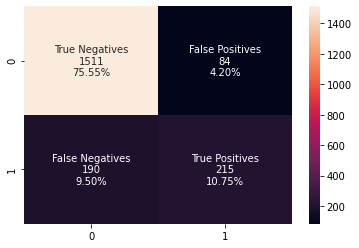

In [71]:
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_matrix, annot=labels, fmt= '')

## With K-Fold Cross Validation

In [78]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(xgb_model, X_test, y_test, cv=5)


In [79]:
conf_mat = confusion_matrix(y_test, y_pred)

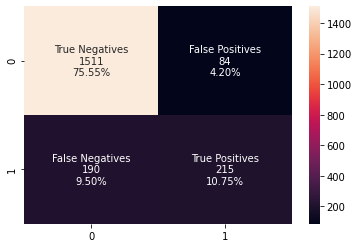

In [80]:
group_names = ['True Negatives', 'False Positives','False Negatives','True Positives']
group_counts = ['{0:0.0f}'.format(value) for value in
                conf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(conf_mat, annot=labels, fmt= '')